### Reading COGs with Python libraries

In [1]:
import rasterio
import gdal
import numpy as np
from pyproj import Proj
import pylab as pl
from shapely.geometry import Point
from shapely.geometry import Polygon
import pandas as pd
import json
import shapely
from shapely import wkt
import geopandas as gpd
from rio_tiler.io import COGReader
from rio_tiler.utils import create_cutline
from rasterio.features import bounds as featureBounds
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\wb542830\Anaconda3\envs\osm1\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from shapely.geometry import Polygon

#### Functions to read data

##### Point data

We're reading [Global Landslide Hazard map](https://datacatalog.worldbank.org/dataset/global-landslide-hazard-map) from World Bank's Data Catalog

In [3]:
with COGReader("https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/1191621/ls_eq_tiled.tif") as cog:
    img = cog.point(72.872314453125,19.132194334419058)

In [4]:
img

[2.9999999242136255e-05]

##### Polygon Data

In [5]:
pol = Polygon([(85.331625, 28.708044), (85.331625, 27.798044), (86.341625, 27.798044), (86.341625, 28.708044)])

In [6]:
with COGReader("https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/1191621/ls_eq_tiled.tif") as cog:
    data, mask = cog.part(pol.bounds, max_size=None)

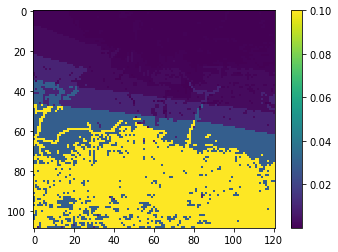

In [7]:
pl.imshow(data[0,:,:])
plt.colorbar()

##### GeoJSON Data

In [8]:
feat ={
      "type": "Feature",
      "properties": {},
      "geometry": {
        "type": "Polygon",
        "coordinates": [
          [
            [
              72.7020263671875,
              19.663280219987662
            ],
            [
              72.8009033203125,
              18.63583516062285
            ],
            [
              73.2623291015625,
              16.830832189624825
            ],
            [
              74.1192626953125,
              17.00951473208515
            ],
            [
              74.849853515625,
              17.748686651728807
            ],
            [
              74.3115234375,
              19.362976133341846
            ],
            [
              72.7020263671875,
              19.663280219987662
            ]
          ]
        ]
      }
    }


# Get BBOX of the polygon
bbox = featureBounds(feat)

# Use COGReader to open and read the dataset
with COGReader("https://development-data-hub-s3-public.s3.amazonaws.com/ddhfiles/1191621/ls_eq_tiled.tif") as cog:
    # Create WTT Cutline
    cutline = create_cutline(cog.dataset, feat, geometry_crs="epsg:4326")

    # Read part of the data (bbox) and use the cutline to mask the data
    _data_, _mask_ = cog.part(bbox, vrt_options={'cutline': cutline})

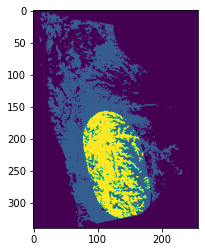

In [9]:
pl.imshow(_data_[0,:,:])